# O-Cloud Data Analysis

#### Requirements

In [1]:
import subprocess

# Run the pip command and capture the output
installedpackages = subprocess.run(['pip', 'freeze'], stdout=subprocess.PIPE, text=True).stdout
# Read requirements from file
with open("./requirements.txt", 'r') as file:
    requirements = file.read()
# Split the multi-line string into a list of lines
lines = requirements.splitlines()
# Check if requirements are installed line by line 
for line in lines:
    index = installedpackages.find(line)
    if index == -1:
        # Install dependecies from requirements.txt
        %pip install -r ./requirements.txt > /dev/null
        break

In [2]:
from OCloud_Data_Analysis import *
from plotly.offline import init_notebook_mode
%matplotlib inline
init_notebook_mode(connected=True)

#### `generate_ax(file)`

This method generates and returns a heatmap plot using Seaborn to visualize data from a CSV file.

##### Parameters

- `file`: Path to the CSV file containing the data for generating the heatmap.

##### Behavior

1. Reads the data from the specified CSV file using `pd.read_csv(file)`.
2. Constructs a pivot table from the data, where rows represent the 'Name' column, columns represent the 'Tactic' column, and values represent the 'Count' column.
3. Generates a heatmap plot using `sns.heatmap()` with the following configurations:
   - `vmin` and `vmax` define the lower and upper limits for color intensity.
   - `center` defines the center value for color mapping.
   - `cmap` specifies the color palette for the heatmap.
   - `square` controls whether to make the heatmap cells square.
4. Returns the generated heatmap plot.

This method provides an easy way to visualize and analyze data from a CSV file using a heatmap plot created with Seaborn.


#### `plot_and_save_heat(ax, file=None)`

This method enhances and saves a heatmap plot generated using Seaborn.

##### Parameters

- `ax`: The heatmap plot axis obtained from `generate_ax()` method or a similar source.
- `file`: Optional parameter specifying the path to save the generated plot. If not provided, the plot will be displayed without saving.

##### Behavior

1. Sets the x-axis tick labels to be rotated at 45 degrees and aligned to the right using `ax.set_xticklabels()`.
2. Removes the grid lines from the plot using `plt.grid(visible=False)`.
3. If `file` is provided, saves the enhanced heatmap plot to the specified path using the `save_plot()` function. If `file` is not provided, the plot will only be displayed.
4. Displays the enhanced heatmap plot.

This method streamlines the customization and saving of Seaborn-generated heatmap plots, making them more informative and visually appealing.


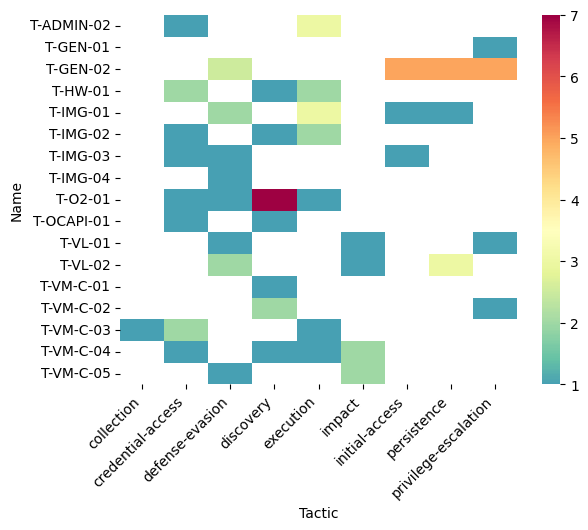

In [6]:
# First
ax = generate_ax('./o_cloud_count_tactics_per_threat.csv')
plot_and_save_heat(ax)

#### `generate_techniques_dataframe()`

This method retrieves techniques data from the ATT&CK framework and returns it as a Pandas DataFrame.

##### Behavior

1. Downloads and parses ATT&CK STIX data for the "enterprise-attack" edition.
2. Converts the parsed data into Pandas DataFrames for techniques, associated relationships, and citations.
3. Returns the Pandas DataFrame containing techniques data.

This method simplifies the process of obtaining and organizing techniques data from ATT&CK into a structured DataFrame format.

#### `get_grouped_o_cloud_data(file, drop_duplicates: bool = False)`

This method retrieves and groups O-Cloud data from a CSV file, enabling further analysis.

##### Parameters

- `file`: The path to the CSV file containing O-Cloud data.
- `drop_duplicates`: An optional boolean parameter to drop duplicate technique entries. Default is `False`.

##### Behavior

1. Reads O-Cloud data from the specified CSV file, utilizing the "Name" column as an index.
2. Optionally drops duplicate entries based on the "Technique" column if `drop_duplicates` is set to `True`.
3. Groups the data by the "Name" column and returns the grouped object.

This method simplifies the analysis of O-Cloud data by grouping it based on specified criteria.

#### `gen_counted_occurrences_per_platform(grouped, techniques_df)`

This method generates a count of occurrences per platform based on grouped data and technique details.

##### Parameters

- `grouped`: Grouped data containing techniques.
- `techniques_df`: DataFrame containing technique details.

##### Behavior

1. Initializes an empty list `platforms` to store platform occurrences.
2. Iterates through each group in the provided `grouped` data.
3. For each technique in the group, extracts associated platforms from `techniques_df`.
4. Appends the extracted platforms to the `platforms` list.
5. Uses itertools to flatten the nested platforms list and calculates platform occurrences.
6. Returns a Pandas Series containing platform occurrences, sorted by count.

This method efficiently provides a count of occurrences per platform by analyzing grouped data and technique details.


#### `plot_and_save_bar(counts, file, show_title: bool = False, show_x_axis_description: bool = True, grid: bool = True, half_width: bool = False, c_palette="mako", rotate_bar_description: int = 45, bar_edge_color='black', x_axis="Platform", y_axis="Counted occurrences", phue=None, set_size: bool = False)`

This method creates a bar plot from provided data and saves it to a file.

##### Parameters

- `counts`: DataFrame containing data for plotting.
- `file`: Path to save the generated plot.
- `show_title`: Optional boolean to show a title on the plot. Default is `False`.
- `show_x_axis_description`: Optional boolean to show x-axis description. Default is `True`.
- `grid`: Optional boolean to show grid lines on the plot. Default is `True`.
- `half_width`: Optional boolean to create bars with half width. Default is `False`.
- `c_palette`: Optional color palette for the bars. Default is "mako".
- `rotate_bar_description`: Optional angle of rotation for x-axis labels. Default is 45.
- `bar_edge_color`: Optional color for the bar edges. Default is 'black'.
- `x_axis`: Optional label for the x-axis. Default is "Platform".
- `y_axis`: Optional label for the y-axis. Default is "Counted occurrences".
- `phue`: Optional variable to create grouped bars. Default is None.
- `set_size`: Optional boolean to set custom figure size. Default is `False`.

##### Behavior

1. Configures the bar plot style with a white grid background.
2. Sets bar width based on the `half_width` parameter.
3. Adjusts figure size if `set_size` is enabled.
4. Creates a bar plot using Seaborn's `barplot()` function.
5. Customizes plot appearance based on provided parameters.
6. Saves the generated plot to the specified `file`.

This method simplifies the process of creating and saving customized bar plots from given data.


2023-08-25 12:21:41.646 | INFO     | mitreattack.attackToExcel.attackToExcel:get_stix_data:69 - Downloading ATT&CK data from github.com/mitre/cti
parsing relationships for type=technique: 100%|█████████████████████████████████████████████████████████████████████████████████████| 16530/16530 [00:00<00:00, 146059.56it/s]


           Platform  Counted occurencies
0           Windows                   94
1             Linux                   84
2             macOS                   81
3              IaaS                   50
4        Containers                   39
5           Network                   25
6  Google Workspace                   24
7        Office 365                   24
8              SaaS                   21
9          Azure AD                   19


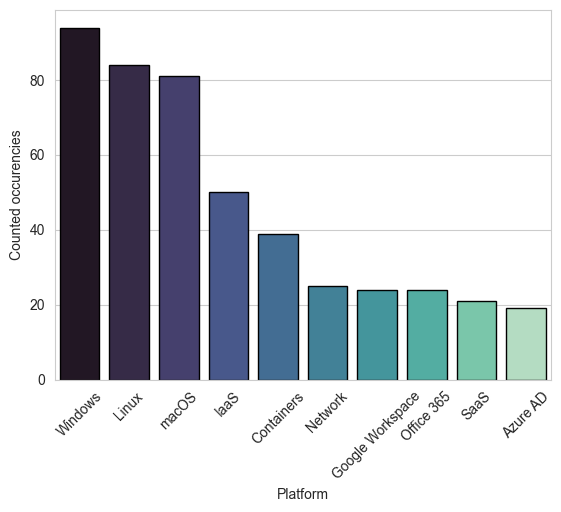

In [7]:
techniques_df = generate_techniques_dataframe()
grouped = get_grouped_o_cloud_data('./o_cloud_technique_mapping_without_subtechniques.csv')
counts = gen_counted_accourences_per_platform(grouped,techniques_df)
print(counts)
plot_and_save_bar(counts,'./count_occ_att_techniques.pdf' )

#### `get_threats_tactics(grouped, techniques_df)`

This method compiles threat-tactic associations from grouped data and technique details.

##### Parameters

- `grouped`: Grouped data containing techniques.
- `techniques_df`: DataFrame containing technique details.

##### Behavior

1. Initializes an empty list `threats_tactics` to store collected associations.
2. Iterates through each group in the provided `grouped` data.
3. For each technique in the group, extracts associated tactics from `techniques_df`.
4. Splits the tactic information and accumulates them in the `tactics` list.
5. Appends tuples of threat and Counter object of tactics to the `threats_tactics` list.

This method efficiently assembles a list of threat-tactic associations by analyzing grouped data and technique details.

#### `write_threats_tactics(file, threats_tactics)`

This method writes threat-tactic associations to a CSV file.

##### Parameters

- `file`: Path to the CSV file where data will be written.
- `threats_tactics`: List of tuples containing threat names and associated tactics.

##### Behavior

1. Opens the specified CSV file in write mode.
2. Initializes a CSV writer and writes a header row with column names ('Name', 'Count', 'Tactic').
3. Iterates through tuples in `threats_tactics`.
4. For each threat-tactic association, writes rows with threat name, tactic count, and tactic name.
5. Closes the file after writing.

This method facilitates the creation of a CSV file containing threat-tactic associations.


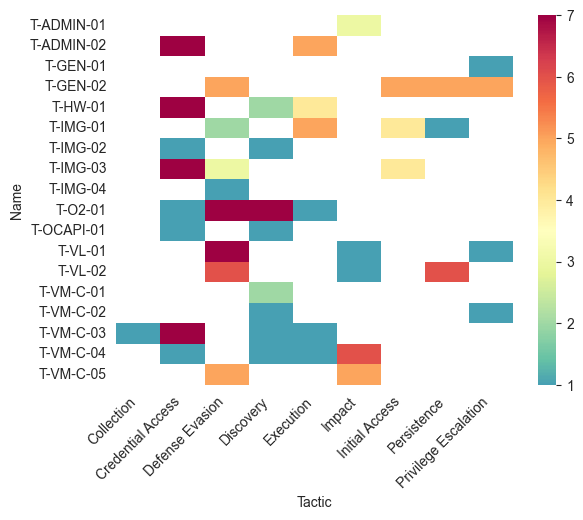

In [8]:
grouped = get_grouped_o_cloud_data('./mapping/o_cloud_technique_mapping_without_subtechniques.csv')
threats_tactics = get_threats_tactics(grouped, techniques_df)

write_threats_tactics('./mapping/automatic_o_cloud_count_tactics_per_threat.csv', threats_tactics)

ax = generate_ax('./mapping/automatic_o_cloud_count_tactics_per_threat.csv')
plot_and_save_heat(ax, './img/tactics_headmap.pdf')

#### `get_json_data(file)`

This method retrieves specific data from a JSON file.

##### Parameters

- `file`: Path to the JSON file.

##### Behavior

1. Reads the JSON file specified by `file`.
2. Extracts and returns the value associated with the key "data" from the JSON.

This method simplifies the process of retrieving specific data from a JSON file.


In [13]:
fetched_info = get_json_data('./scans/t-cwe-cve-dict.json')
print_stats(fetched_info)

Count_cwe: 41
Count_cve: 332
avg_v2_score: 5.078178374655647
avg_v2_impact_score: 4.2803839531680445
avg_v2_exploitability_score: 8.10101756198347


#### `gen_statistics_per_tactic(fetched_info)`

This method generates statistics per technique and severity level.

##### Parameters

- `fetched_info`: List of dictionaries containing fetched technique information.

##### Behavior

1. Initializes an empty DataFrame named `overall_df` with columns ["Score", "Severity", "Technique"].
2. Iterates through each technique in `fetched_info` and processes related findings.
3. Constructs an intermediate DataFrame `inter_df` to hold individual findings' scores and severities.
4. For each CVE, if there are scores available, constructs a DataFrame containing scores and severities.
5. Concatenates individual findings' DataFrames to `inter_df`.
6. Appends the technique ID to the `Technique` column in `inter_df`.
7. Concatenates `inter_df` to `overall_df`.
8. Defines an ordered categorical data type for the severity column.
9. Casts the "Severity" column in `overall_df` to the defined categorical data type.
10. Groups and aggregates data in `overall_df` by technique and severity, summing scores.
11. Returns a DataFrame with technique, severity, and aggregated score.

This method facilitates the generation of statistics per technique and severity level from fetched technique information.

#### `plot_and_save_bar(counts, file, show_title: bool = False, show_x_axis_description: bool = True, grid: bool = True, half_width: bool = False, c_palette="mako", rotate_bar_description: int = 45, bar_edge_color='black', x_axis="Platform", y_axis="Counted occurrences", phue=None, set_size: bool = False)`

This method creates a bar plot from provided data and optionally saves it to a file.

##### Parameters

- `counts`: DataFrame containing data for plotting.
- `file`: Path to save the generated plot. If not provided, the plot will be displayed without saving.
- `show_title`: Optional boolean to show a title on the plot. Default is `False`.
- `show_x_axis_description`: Optional boolean to show x-axis description. Default is `True`.
- `grid`: Optional boolean to show grid lines on the plot. Default is `True`.
- `half_width`: Optional boolean to create bars with half width. Default is `False`.
- `c_palette`: Optional color palette for the bars. Default is "mako".
- `rotate_bar_description`: Optional angle of rotation for x-axis labels. Default is 45.
- `bar_edge_color`: Optional color for the bar edges. Default is 'black'.
- `x_axis`: Optional label for the x-axis. Default is "Platform".
- `y_axis`: Optional label for the y-axis. Default is "Counted occurrences".
- `phue`: Optional variable to create grouped bars. Default is None.
- `set_size`: Optional boolean to set custom figure size. Default is `False`.

##### Behavior

1. Configures the bar plot style with a white grid background.
2. Sets bar width based on the `half_width` parameter.
3. Optionally adjusts figure size if `set_size` is enabled.
4. Creates a bar plot using Seaborn's `barplot()` function.
5. Customizes plot appearance based on provided parameters.
6. If `show_title` is True, displays a title on the plot.
7. If `show_x_axis_description` is False, removes x-axis description.
8. If `grid` is False, hides grid lines on the plot.
9. Rotates x-axis labels based on `rotate_bar_description`.
10. If `file` is provided, saves the generated plot to the specified path.
11. If `file` is not provided, displays the plot without saving.

This method simplifies the process of creating and optionally saving customized bar plots from given data.


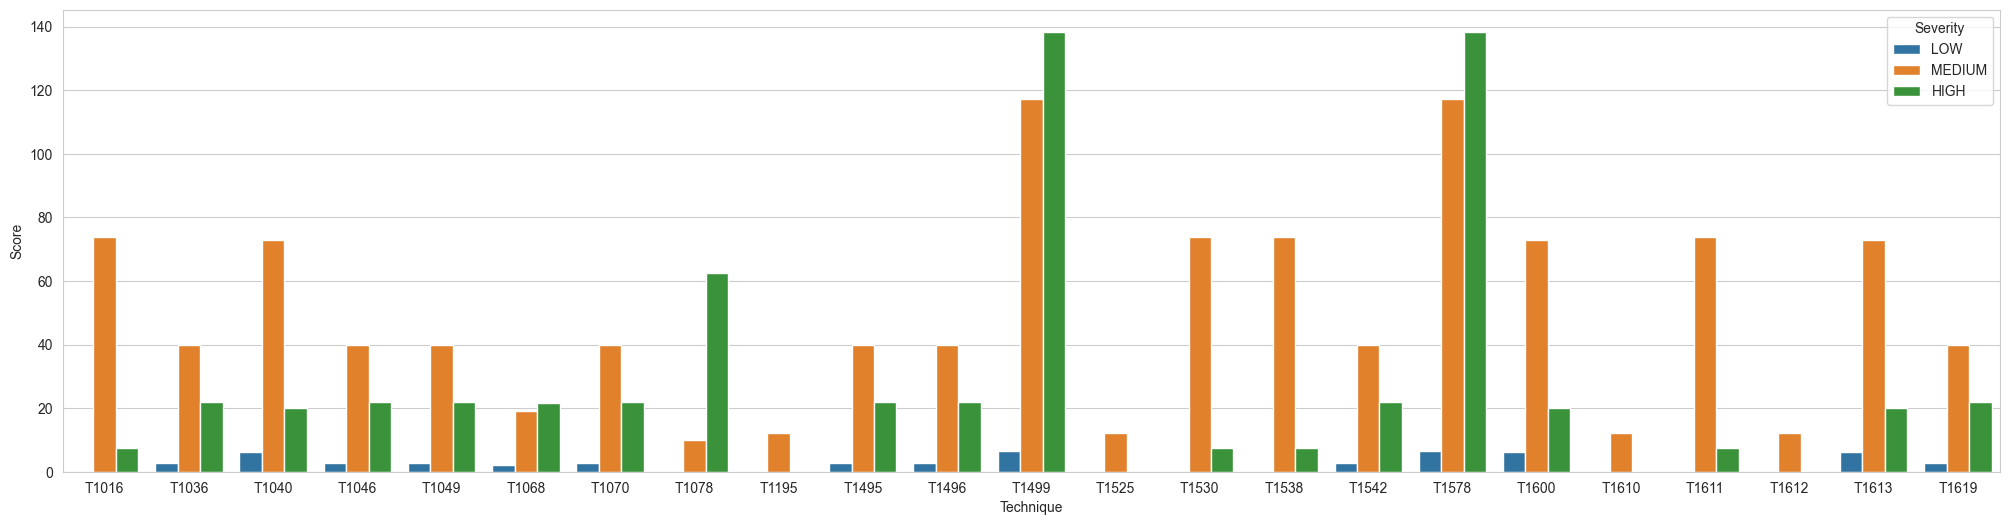

In [14]:
sum_overall_technique_df = gen_statistics_per_tactic(fetched_info)
plot_and_save_bar(counts = sum_overall_technique_df,file=None,c_palette="tab10",x_axis="Technique",y_axis="Score",phue="Severity",rotate_bar_description=0,set_size=True, bar_edge_color="White")

#### `insert_length_wise(df, cols=('AV', 'AC', 'Au', 'C', 'I', 'A'), origin_col='Vector')`

This method reshapes a DataFrame by inserting elements length-wise from a specified column.

##### Parameters

- `df`: DataFrame containing the original data.
- `cols`: Tuple specifying the desired columns in the reshaped DataFrame. Default is ('AV', 'AC', 'Au', 'C', 'I', 'A').
- `origin_col`: Name of the column from which elements will be inserted. Default is 'Vector'.

##### Behavior

1. Creates a list from the specified column (`origin_col`) in the original DataFrame (`df`).
2. Calculates the dimensions of the reshaped DataFrame based on the length of the list and the number of desired columns.
3. Reshapes the list into the calculated dimensions using NumPy's `reshape()` function.
4. Constructs a new DataFrame using the reshaped array and specified columns.
5. Returns the reshaped DataFrame.

This method facilitates the transformation of data by inserting elements length-wise into a new DataFrame with the desired column structure.


##### `gen_vector_df(fetched_info, lo_net)`

This method generates a DataFrame containing vectors for a specified network type.

##### Parameters

- `fetched_info`: List of dictionaries containing fetched technique information.
- `lo_net`: Specific network type to filter vectors.

##### Behavior

1. Initializes an empty DataFrame named `vector_df` with a single column "Vector".
2. Iterates through each technique in `fetched_info` and processes related findings.
3. For each CVE, if the network type matches `lo_net`, creates a DataFrame with vectors.
4. Concatenates the newly created DataFrame to `vector_df`.
5. Skips entries that do not match the specified network type.
6. Returns the DataFrame containing vectors.

This method simplifies the creation of a DataFrame containing vectors based on fetched technique information and a specified network type.


#### `plot_and_save_radar(df, file=None, groups=None, filled: bool = True, dotted: bool = False)`

This method creates and optionally saves a radar (spider) plot from provided data.

##### Parameters

- `df`: DataFrame containing data for plotting.
- `file`: Path to save the generated plot. If not provided, the plot will be displayed without saving.
- `groups`: List of groups to be plotted. If not provided, all groups in the DataFrame will be plotted.
- `filled`: Optional boolean to fill the area under the plot lines. Default is `True`.
- `dotted`: Optional boolean to create plot lines with dots. Default is `False`.

##### Behavior

1. Calculates the angles for each axis based on the number of variables in the DataFrame.
2. Initializes the spider plot using the `init_spider_supplot()` function.
3. Sets the offset and direction of the theta (angular) axis.
4. Draws axes and adds labels based on calculated angles and categories.
5. Iterates through provided groups and plots radar lines for each group.
6. If `dotted` is enabled, plots lines with dots; otherwise, uses solid lines.
7. If `filled` is enabled, fills the area under the plot lines.
8. Adjusts layout padding using `set_pad_spwp()` function.
9. Adds a legend to the plot.
10. If `file` is provided, saves the generated plot to the specified path.
11. If `file` is not provided, displays the plot without saving.

This method simplifies the creation and optional saving of radar plots from given data.


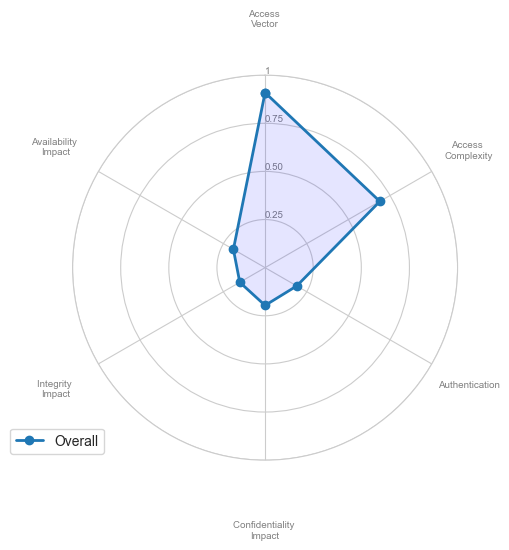

In [15]:

#vector = "AV:N/AC:M/Au:N/C:C/I:C/A:C"

mapping = {"AC": "Access Complexity", "Au": "Authentication",
                   "AV": "AccessVector", "C": "Confidentiality Impact",
                   "I": "Integrity Impact", "A": "Availability Impact"}
#---------

vector_df_network = gen_vector_df(fetched_info, "NETWORK")
vector_df_local = gen_vector_df(fetched_info, "LOCAL")

vector_df_network = insert_lenth_wise(vector_df_network)
vector_network_avgs = vector_df_network.mean(axis=0)

vector_df_local = insert_lenth_wise(vector_df_local)
vector_local_avgs = vector_df_local.mean(axis=0)
    

# Extract the vectors from the fetched_info data
vectors = [get_scores_from_vector(cve["v2_vector"]) for technique in fetched_info for cwes in technique["t_findings"] for cves in cwes["c_findings"] for cve in cves["cves"]]

# Create the vector_df dataframe using the list of vectors
vector_df = pd.DataFrame(vectors, columns=['AV','AC', 'Au', 'C', 'I', 'A'])

# Calculate the average values for each column in the dataframe
vector_avgs = vector_df.mean(axis=0)

# Set data
df = pd.DataFrame({
'group': ['Overall'],
'Access \nVector': [vector_avgs.AV],
'Access \nComplexity': [vector_avgs.AC],
'Authentication': [vector_avgs.A],
'Confidentiality \nImpact': [vector_avgs.C],
'Integrity \nImpact': [vector_avgs.I],
'Availability \nImpact': [vector_avgs.A]
})

plot_and_save_radar(df,filled=True,dotted=True)


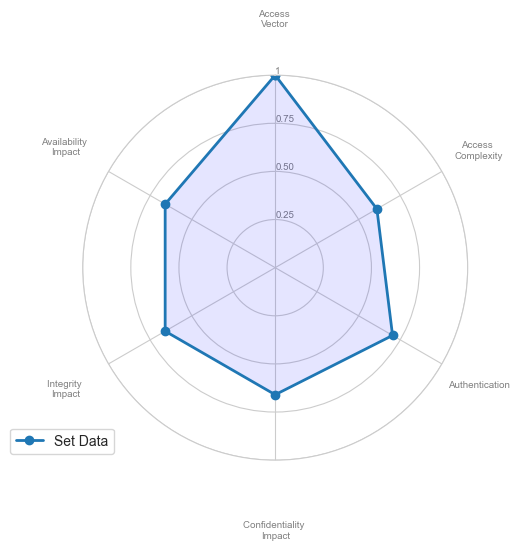

In [16]:
# Set data
df = pd.DataFrame({
'group': ['Set Data'],
'Access \nVector': [1],
'Access \nComplexity': [0.61],
'Authentication': [0.704],
'Confidentiality \nImpact': [0.66],
'Integrity \nImpact': [0.66],
'Availability \nImpact': [0.66]
})

plot_and_save_radar(df,filled=True,dotted=True)

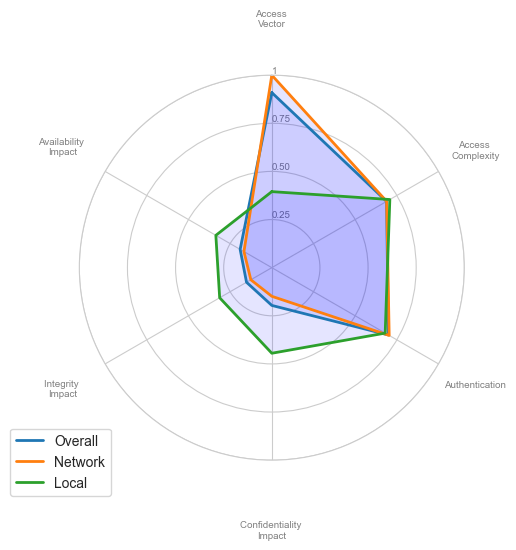

In [17]:
 # Set data
df = pd.DataFrame({
'group': ['Overall', 'Network', 'Local'],
'Access \nVector': [vector_avgs.AV, vector_network_avgs.AV, vector_local_avgs.AV],
'Access \nComplexity': [vector_avgs.AC, vector_network_avgs.AC, vector_local_avgs.AC],
'Authentication': [vector_avgs.Au, vector_network_avgs.Au, vector_local_avgs.Au],
'Confidentiality \nImpact': [vector_avgs.C, vector_network_avgs.C, vector_local_avgs.C],
'Integrity \nImpact': [vector_avgs.I, vector_network_avgs.I, vector_local_avgs.I],
'Availability \nImpact': [vector_avgs.A, vector_network_avgs.A, vector_local_avgs.A]
})  

plot_and_save_radar(df)


#### `gen_o_ran_threats_severity(grouped, sum_overall_technique_df)`

This method generates a DataFrame summarizing O-RAN threats severity levels.

##### Parameters

- `grouped`: Grouped DataFrame containing O-RAN threat information.
- `sum_overall_technique_df`: DataFrame containing summarized overall technique information.

##### Behavior

1. Initializes an empty DataFrame named `o_ran_threats_severity` to store summarized severity levels.
2. Iterates through each group of O-RAN threats in the provided `grouped` DataFrame.
3. For each group, initializes an empty DataFrame named `o_ran_threats`.
4. Iterates through each technique in the group and concatenates corresponding technique information.
5. Groups the `o_ran_threats` DataFrame by severity and calculates the sum of values.
6. Resets the index of the grouped DataFrame and adds a new column "O-RAN Threat" with the group name.
7. Concatenates the grouped DataFrame to `o_ran_threats_severity`.
8. Returns the summarized DataFrame containing O-RAN threats and their severity levels.

This method simplifies the creation of a DataFrame summarizing severity levels of O-RAN threats by grouping and aggregating technique information.


#### `plot_and_save_bar_broken_axis(o_ran_threats_severity, file)`

This method creates and saves a bar plot with a broken y-axis for summarizing O-RAN threats severity.

##### Parameters

- `o_ran_threats_severity`: DataFrame containing summarized O-RAN threats severity information.
- `file`: Path to save the generated plot.

##### Behavior

1. Creates a figure with two subplots using `subplots()` function, enabling a broken y-axis layout.
2. Sets the overall style to whitegrid using `sns.set_style("whitegrid")`.
3. Generates two bar plots using `sns.barplot()`, one for each subplot, based on O-RAN threats severity data.
4. Uses different color palettes for each severity level using the "crest" palette.
5. Adds black edges to the bars using the `edgecolor` parameter.
6. Sets grids on for both subplots using `sc_bar.grid(True)`.
7. Adjusts y-axis limits for both subplots to create a broken y-axis effect.
8. Removes the spines (axes lines) from the bottom subplot using `sns.despine(ax=ax_bottom)`.
9. Sets font sizes for various elements using `plt.rc()` to control the appearance of the plot.
10. Saves the generated plot to the specified `file` path.
11. Displays the plot.

This method simplifies the creation of a bar plot with a broken y-axis for summarizing O-RAN threats severity, making it easier to visualize and interpret the data.


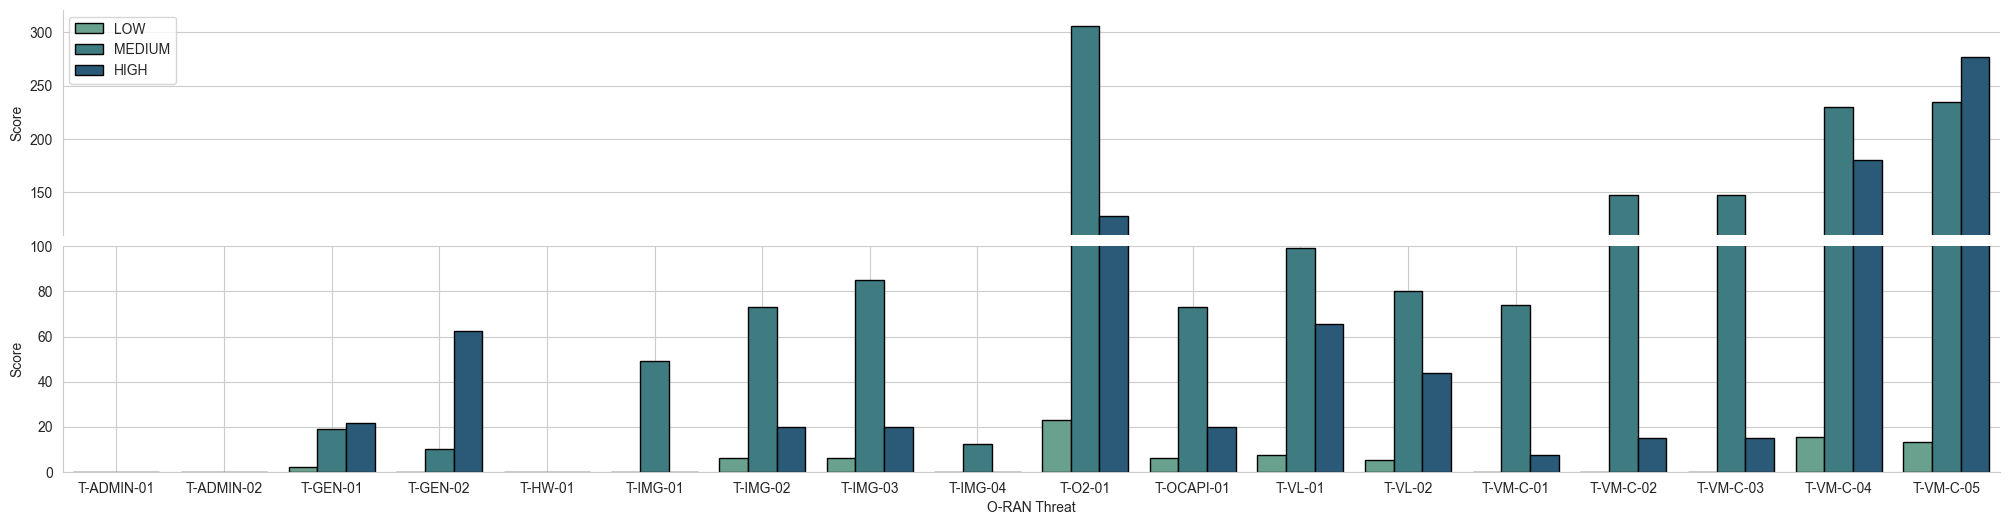

In [18]:
o_cloud = pd.read_csv('./mapping/o_cloud_technique_mapping_without_subtechniques.csv', sep=';', index_col=0)

# Set the argument dropDuplicates to "True" if you want to have techniques count only once
grouped = get_grouped_o_cloud_data('./mapping/o_cloud_technique_mapping_without_subtechniques.csv',drop_duplicates=False)
o_ran_threats_severity = gen_o_ran_threats_severity(grouped,sum_overall_technique_df)
plot_and_save_bar_broken_axis(o_ran_threats_severity, file = './img/acc_cvi_scores_per_threat.pdf')